Librerias a utilizar

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Extraer la AUTH_API proveida por la ENACOM

In [3]:
# Deben instalar esta libreria 
from dotenv import load_dotenv
import os

# reemplaza esto con la ruta completa del archivo .env
load_dotenv(dotenv_path=".env")

auth_api = os.environ.get("AUTH_API")

Claro que sí, puedo ayudarte a mejorar la ortografía en tu texto:

La plataforma de ENACOM nos permite observar varios aspectos sobre la realidad de los servicios de internet en Argentina; aspectos que pueden llegar a ser un enfoque de estudio. Entre ellos tenemos:

- Las diferentes tecnologías utilizadas para proveer internet al país.
- Las diferentes velocidades que estas tecnologías proveen.
- Cómo los ingresos trimestrales han ido aumentando de manera casi lineal a lo largo de los años.

Tomando estos 3 aspectos, se ha decidido hacer un análisis exploratorio tomando en cuenta estos 3 objetos de análisis.

Recolectamos la informacion de las diferentes tecnologias utilizadas por provincia y las velecidades que estos sistemas proveen.

In [5]:
import requests

# Informacion de la API pedida en formato ajson
url_internet_provincia = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-POR/data.ajson/?auth_key={auth_api}"
acc_inter_rangos_veloc = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-23248/data.ajson/?auth_key={auth_api}"

# Pedimos el get request a las API
response_internet_provincia = requests.get(url_internet_provincia)
response_acc_inter_rangos_veloc = requests.get(acc_inter_rangos_veloc)

# Almacenamos la informacion en una lista para automatizar un poco mas el proceso
data = []
for response in [response_internet_provincia, response_acc_inter_rangos_veloc]:
    if response.status_code == 200:
        data.append(response.json())
    else:
        print("Error en la petición:", response.status_code)

In [6]:
display(data[0])
display(data[1])

{'result': [['Año',
   'Trimestre',
   'Provincia',
   'ADSL',
   'Cablemodem',
   'Fibra óptica',
   'Wireless',
   'Otros',
   'Total'],
  ['2022',
   '3',
   'Buenos Aires',
   '339,648',
   '2,748,325',
   '1,436,433',
   '126,846',
   '70,416',
   '4,721,668'],
  ['2022',
   '3',
   'Capital Federal',
   '140,791',
   '1,240,125',
   '129,218',
   '5,758',
   '31,787',
   '1,547,679'],
  ['2022',
   '3',
   'Catamarca',
   '10,010',
   '10,495',
   '46,224',
   '1,329',
   '2,235',
   '70,293'],
  ['2022',
   '3',
   'Chaco',
   '27,164',
   '61,800',
   '44,645',
   '8,178',
   '2,359',
   '144,146'],
  ['2022',
   '3',
   'Chubut',
   '45,377',
   '72,212',
   '9,574',
   '29,784',
   '8,831',
   '165,778'],
  ['2022',
   '3',
   'Córdoba',
   '163,770',
   '465,461',
   '338,570',
   '61,070',
   '9,797',
   '1,038,668'],
  ['2022',
   '3',
   'Corrientes',
   '36,508',
   '77,140',
   '18,619',
   '7,256',
   '5,323',
   '144,846'],
  ['2022',
   '3',
   'Entre Ríos',
   '60,3

{'result': [['Año',
   'Trimestre',
   'Provincia',
   'HASTA 512 kbps',
   '+ 512 Kbps - 1 Mbps',
   '+ 1 Mbps - 6 Mbps',
   '+ 6 Mbps - 10 Mbps',
   '+ 10 Mbps - 20 Mbps',
   '+ 20 Mbps - 30 Mbps',
   '+ 30 Mbps',
   'OTROS',
   'Total'],
  ['2022',
   '3',
   'Buenos Aires',
   '29,985',
   '27,709',
   '290,315',
   '297,915',
   '267,044',
   '124,190',
   '3,618,689',
   '65,821',
   '4,721,668'],
  ['2022',
   '3',
   'Capital Federal',
   '517',
   '5,742',
   '34,371',
   '67,829',
   '51,946',
   '28,692',
   '1,253,105',
   '105,477',
   '1,547,679'],
  ['2022',
   '3',
   'Catamarca',
   '71',
   '384',
   '3,107',
   '5,389',
   '5,099',
   '3,737',
   '50,298',
   '2,208',
   '70,293'],
  ['2022',
   '3',
   'Chaco',
   '461',
   '987',
   '16,782',
   '18,938',
   '8,049',
   '15,828',
   '79,390',
   '3,711',
   '144,146'],
  ['2022',
   '3',
   'Chubut',
   '109',
   '1,444',
   '45,707',
   '30,940',
   '34,682',
   '15,309',
   '17,563',
   '20,024',
   '165,778'],
 

Como podemos observar al en **category_name**, la informacion esta relacionada con el acceso a internet.
Y la informacion de la tabla esta en **result**.

Pasamos la informacion recibida dataframes de pandas para facilitar su analisis.

In [7]:
df_internet_provincia = pd.DataFrame(data[0]['result'][1:], columns=data[0]['result'][0])
df_veloc_provincia = pd.DataFrame(data[1]['result'][1:], columns=data[1]['result'][0])

Podemos observar que la informacion fue correctamente cargada, pero... Hay algo extranio

In [8]:
df_internet_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           841 non-null    object
 1   Trimestre     841 non-null    object
 2   Provincia     841 non-null    object
 3   ADSL          841 non-null    object
 4   Cablemodem    841 non-null    object
 5   Fibra óptica  841 non-null    object
 6   Wireless      841 non-null    object
 7   Otros         841 non-null    object
 8   Total         841 non-null    object
dtypes: object(9)
memory usage: 59.3+ KB


In [9]:
df_veloc_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  840 non-null    object
 1   Trimestre            840 non-null    object
 2   Provincia            840 non-null    object
 3   HASTA 512 kbps       840 non-null    object
 4   + 512 Kbps - 1 Mbps  840 non-null    object
 5   + 1 Mbps - 6 Mbps    840 non-null    object
 6   + 6 Mbps - 10 Mbps   840 non-null    object
 7   + 10 Mbps - 20 Mbps  840 non-null    object
 8   + 20 Mbps - 30 Mbps  840 non-null    object
 9   + 30 Mbps            840 non-null    object
 10  OTROS                840 non-null    object
 11  Total                840 non-null    object
dtypes: object(12)
memory usage: 78.9+ KB


Valores que deberian ser numericos, aparecen como tipo object.

In [10]:
display(df_internet_provincia.head())
display(df_veloc_provincia.head())

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,"339,648","2,748,325","1,436,433","126,846","70,416","4,721,668"
1,2022,3,Capital Federal,"140,791","1,240,125","129,218","5,758","31,787","1,547,679"
2,2022,3,Catamarca,"10,010","10,495","46,224","1,329","2,235","70,293"
3,2022,3,Chaco,"27,164","61,800","44,645","8,178","2,359","144,146"
4,2022,3,Chubut,"45,377","72,212","9,574","29,784","8,831","165,778"


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,"29,985","27,709","290,315","297,915","267,044","124,190","3,618,689","65,821","4,721,668"
1,2022,3,Capital Federal,517,"5,742","34,371","67,829","51,946","28,692","1,253,105","105,477","1,547,679"
2,2022,3,Catamarca,71,384,"3,107","5,389","5,099","3,737","50,298","2,208","70,293"
3,2022,3,Chaco,461,987,"16,782","18,938","8,049","15,828","79,390","3,711","144,146"
4,2022,3,Chubut,109,"1,444","45,707","30,940","34,682","15,309","17,563","20,024","165,778"


Esto es debido a que las registros tienen  el elemento tipo string **(,)**. Hay que removerlo.

Al visualizar los datos de ambos datasets, se encontro un problema en particular en la columna de anio en el dataframe de df_internet_provincia

In [11]:
display(df_internet_provincia['Año'].unique())
display(df_veloc_provincia['Año'].unique())

array(['2022', '2021', '2020', '2019', '2019 *', '2018', '2017', '2016',
       '2015', '2014', '*'], dtype=object)

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014'], dtype=object)

Algunos valores no correspondientes existen, veamoslos mas en especifico

In [12]:
display(df_internet_provincia.loc[df_internet_provincia.values == '*'])
display(df_internet_provincia.loc[df_internet_provincia.values == '2019 *'])

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
840,*,Los datos provinciales no coinciden a nivel na...,,,,,,,


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
288,2019 *,3 *,Buenos Aires,"1,277,249","2,144,956","425,386","85,572","27,070","3,960,233"
289,2019 *,3 *,Capital Federal,"300,288","1,080,973","24,900","3,895","31,155","1,441,211"
290,2019 *,3 *,Catamarca,"24,349","5,543",13,244,"2,251","32,400"
291,2019 *,3 *,Chaco,"50,416","49,156","8,063","5,224","1,592","114,451"
292,2019 *,3 *,Chubut,"37,298","27,090","1,917","15,149","7,551","89,005"
...,...,...,...,...,...,...,...,...,...
355,2019 *,1 *,Santa Cruz,"10,659","4,615",382,"6,514","2,735","24,905"
356,2019 *,1 *,Santa Fe,"340,038","340,344","15,621","23,215","17,860","737,078"
357,2019 *,1 *,Santiago Del Estero,"25,337","61,547",23,"2,847",99,"89,853"
358,2019 *,1 *,Tierra Del Fuego,"19,789","23,549","1,623",0,"1,486","46,447"


Encontramos un registro sin sentido y registros con (*) que perjudican el analisis. Hay que removerlos

In [13]:
df_internet_provincia = df_internet_provincia.applymap(lambda x: x.strip().replace(',', '').replace('*', '') if isinstance(x, str) else x)
df_veloc_provincia = df_veloc_provincia.applymap(lambda x: x.strip().replace(',', '').replace('*', '') if isinstance(x, str) else x)
df_internet_provincia = df_internet_provincia.drop(840)

Ya removidas las comas y asteriscos, solo queda cambiar el dtype de las columnas por el correspondiente.

Para esto primero tomamos todas las columnas de cada dataframe, excepto la de Provincia y las transformamos a tipo int64, esto para evitar alguna incompatibilidad por el tamanno de las variables.

In [14]:
display(df_internet_provincia.columns)
display(df_veloc_provincia.columns)

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

In [15]:
col_vel = ['Año', 'Trimestre', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total']

col_int_prov = ['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total']


df_internet_provincia[col_int_prov] = df_internet_provincia[col_int_prov].astype(np.int64)
df_veloc_provincia[col_vel] = df_veloc_provincia[col_vel].astype(np.int64)

ValueError: invalid literal for int() with base 10: ''

Busquemos estos valores faltantes

In [16]:
df_veloc_provincia.loc[df_veloc_provincia.values == '']

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
313,2019,2,Capital Federal,74,1027,281370,124087,239691,296155,475991,,1418395
323,2019,2,La Rioja,9,11,39819,4297,4857,13,1298,,50304
324,2019,2,Mendoza,20,2522,205165,2971,10092,1256,234,,222260
331,2019,2,Santa Cruz,25,84,24861,3806,1202,28,4,,30010
334,2019,2,Tierra Del Fuego,6,123,41824,4241,1573,96,32,,47895
335,2019,2,Tucumán,16,157,78891,44296,24291,628,18394,,166673


Por logica, podemos determinar el valor de otros haciendo una diferencia entre las sumas de las velocidades y el total.
En este caso todas las operaciones dan 0.

In [17]:
df_veloc_provincia.loc[df_veloc_provincia['OTROS'] == '', 'OTROS'] = 0

Ahora si convertimos las variables a int64

In [18]:
df_veloc_provincia[col_vel] = df_veloc_provincia[col_vel].astype(np.int64)

Ahora que ya se limpiaron disponibilizaron los datos, haremos un analisis para generar una propuesta de negocio.
Para esto uniremos los dos dataframes y haremos una matriz de correlacion para identificar que tecnologia de internet es el mas adecuado para proveer y a que velocidades serian las mejores para vender.

Para evitar confusiones, se reemplaza el nombre de Otros en cada columna por un nombre mas representativo.

In [19]:
df_internet_provincia = df_internet_provincia.rename(columns={'Otros': 'Otros_Prov'}) 
df_internet_provincia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros_Prov,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778


In [20]:
df_veloc_provincia = df_veloc_provincia.rename(columns={'OTROS': 'Otros_Veloc'})
df_veloc_provincia.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros_Veloc,Total
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,124190,3618689,65821,4721668
1,2022,3,Capital Federal,517,5742,34371,67829,51946,28692,1253105,105477,1547679
2,2022,3,Catamarca,71,384,3107,5389,5099,3737,50298,2208,70293
3,2022,3,Chaco,461,987,16782,18938,8049,15828,79390,3711,144146
4,2022,3,Chubut,109,1444,45707,30940,34682,15309,17563,20024,165778


Juntamos ambos dataframes utilizando las columnas en comun que tienen.

In [21]:
df_total = pd.merge(df_veloc_provincia, df_internet_provincia, on=['Año', 'Trimestre','Provincia','Total'])

In [22]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  319 non-null    int64 
 1   Trimestre            319 non-null    int64 
 2   Provincia            319 non-null    object
 3   HASTA 512 kbps       319 non-null    int64 
 4   + 512 Kbps - 1 Mbps  319 non-null    int64 
 5   + 1 Mbps - 6 Mbps    319 non-null    int64 
 6   + 6 Mbps - 10 Mbps   319 non-null    int64 
 7   + 10 Mbps - 20 Mbps  319 non-null    int64 
 8   + 20 Mbps - 30 Mbps  319 non-null    int64 
 9   + 30 Mbps            319 non-null    int64 
 10  Otros_Veloc          319 non-null    int64 
 11  Total                319 non-null    int64 
 12  ADSL                 319 non-null    int64 
 13  Cablemodem           319 non-null    int64 
 14  Fibra óptica         319 non-null    int64 
 15  Wireless             319 non-null    int64 
 16  Otros_Pr

Las datos se vieron reducidos por no poseer el mismo numero de registros coincidentes entre ambos.

Veamos hasta que anio hay registro entre ambas columnas

In [23]:
df_total.Año.unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

Tenemos registros desde el anio 2014.

In [24]:
df_total.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros_Veloc,Total,ADSL,Cablemodem,Fibra óptica,Wireless,Otros_Prov
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,124190,3618689,65821,4721668,339648,2748325,1436433,126846,70416
1,2022,3,Capital Federal,517,5742,34371,67829,51946,28692,1253105,105477,1547679,140791,1240125,129218,5758,31787
2,2022,3,Catamarca,71,384,3107,5389,5099,3737,50298,2208,70293,10010,10495,46224,1329,2235
3,2022,3,Chaco,461,987,16782,18938,8049,15828,79390,3711,144146,27164,61800,44645,8178,2359
4,2022,3,Chubut,109,1444,45707,30940,34682,15309,17563,20024,165778,45377,72212,9574,29784,8831


Ya juntos, ahora se creara una matriz de correlacion para encontrar, valga la redundacia, la correlacion entre la velocidades de internet que hay en el mercado y las tecnologias que las proveen.

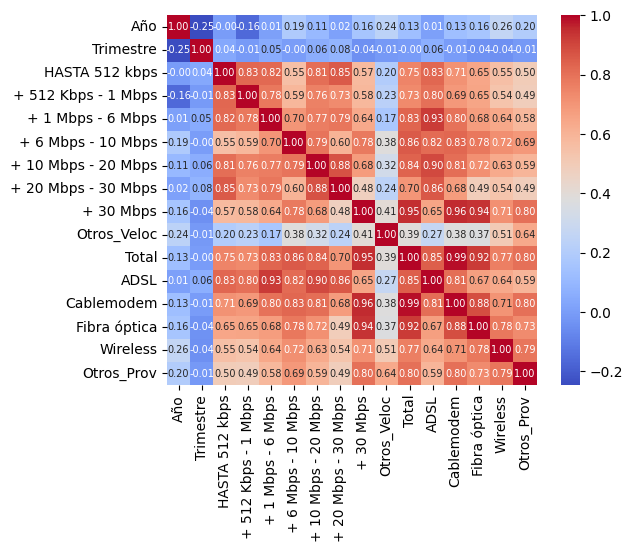

In [25]:
corr = df_total.corr(numeric_only=True)
plt.Figure(figsize=(30,30))
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7},
            cmap='coolwarm')
plt.show()

La variable a analizar seria Total, debido a que esta resume la relacion entre velocidades y tecnologias usadas por los Argentinos.

- Gracias a esta se puede analizar que la mayoria de la poblacion Argentina utiliza Cablemodem como medio de conexion a la red de internet, pero no muy por detras se encuentra la Fibra óptica.

- Tambien podemos identificar que la mayoria de los Argentinos suelen contratar un internet de +30 Mbps.

Teniendo el par de conclusiones anteriores podemos empezar crear un producto que contenga internet Cablemodem o Fibra óptica con velocidades de conexion mayores a 30 Mbps.

Grafiquemos y veamos el comportamiento de ambas tecnologias a lo largo de estos anios

In [26]:
df_long = pd.melt(df_internet_provincia, id_vars=['Año'], value_vars=['Cablemodem', 'Fibra óptica'], var_name='Variable', value_name='Cantidad')

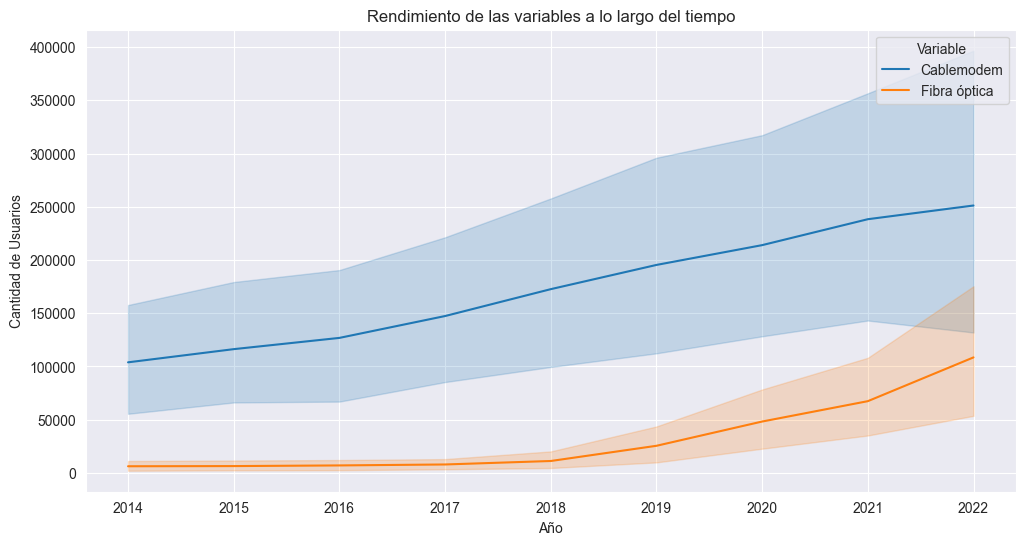

In [27]:
# Create line plot
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Año', y='Cantidad', hue='Variable')
plt.title("Rendimiento de las variables a lo largo del tiempo")
plt.xlabel("Año")
plt.ylabel("Cantidad de Usuarios")
plt.show()

Podemos identficar una clara ventaja de Cablemodem con respecto a la Fibra óptica durante estos anios, pero la fibra optica esta tendiendo a la alza, entonces podria valer la pena apostar a un servicio de internet atraves de fibra optica.

### SERVICIOS ADICIONALES

Extraer la data de TV y Telefonia fija

In [57]:
url_tv = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/INGRE-TRIME-POR-LA-86109/data.ajson/?auth_key={auth_api}&limit=50&"
url_fija = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/INGRE-TRIME-POR-LA-96059/data.ajson/?auth_key={auth_api}&limit=50"
response_tv = requests.get(url_tv)
response_fija = requests.get(url_fija)

data_service = []
for response in [response_tv, response_fija]:
    if response_tv.status_code == 200:
        data_service.append(response.json())
    else:
        print("Error en la petición:", response.status_code)

In [61]:
data_service[0]['result'][0]

['Año',
 'Trimestre',
 'Ingresos TV por suscripción  (miles de $)',
 'Ingresos TV satelital (miles de $)']

Exportamos los datasets de ingresos para los servicios de internet, telefonia movil y telefonia fija y tambien de television

In [62]:
df_internet = pd.read_csv('../data/Internet_Ingresos.csv')
df_movil = pd.read_csv('../data/Telefonia_movil.csv')
df_tv = pd.DataFrame(data_service[0]['result'][1:], columns=data_service[0]['result'][0])
df_fija = pd.DataFrame(data_service[1]['result'][1:], columns=data_service[1]['result'][0])

In [63]:
print('df_fija')
display(df_fija.head())
print('df_internet')
display(df_internet.head())
print('df_movil')
display(df_movil.head())
print('df_tv')
display(df_tv.head())

df_fija


,Año,Trimestre,Ingresos (miles de $)
0,2014,1,"2,916,071.75"
1,2014,2,"2,974,865.2"
2,2014,3,"3,105,462.02"
3,2014,4,"3,339,690.9"
4,2015,1,"3,260,124.75"


df_internet


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


df_movil


,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,$ 13.135.235,Ene-Mar 2013
1,2013,2,$ 13.970.806,Abr-Jun 2013
2,2013,3,$ 15.235.659,Jul-Sept 2013
3,2013,4,$ 16.218.846,Oct-Dic 2013
4,2014,1,$ 15.938.353,Ene-Mar 2013


df_tv


,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2022,3,"52,242,784.63","27,073,190.89"
1,2022,2,"46,292,673.44","23,559,484.83"
2,2022,1,"42,093,870.19","21,268,086.24"
3,2021,4,"38,273,391.8","18,038,065.44"
4,2021,3,"36,398,025.53","18,039,519.5"


Como vemos tienen problemas similiares a los encontrados en los dataframes anteriores, pero con la particularidad que algunos tienen el simbolo ($) en los registros

In [64]:
df_internet = df_internet.applymap(lambda x: x.replace('.', '').replace('$', '') if isinstance(x, str) else x)
df_movil = df_movil.applymap(lambda x: x.replace('.', '').replace('$', '') if isinstance(x, str) else x)
df_tv = df_tv.applymap(lambda x: x.replace(',', '').replace('$', '').replace('.', '') if isinstance(x, str) else x)
df_fija = df_fija.applymap(lambda x: x.replace('.', '').replace(',', '') if isinstance(x, str) else x)


Se aplicara la misma logica de juntar los dataframes para encontrar correlaciones logicas entre las variables.

Para esto es necesario eliminar las columnas de periodo en los dataframes de df_internet y df_movil, que ya estan representados por la columna de trimestre.

In [65]:
df_internet.drop(columns='Periodo', inplace=True)
df_movil.drop(columns='Periodo', inplace=True)

In [66]:
df_internet = df_internet.astype(np.int64)
df_movil = df_movil.astype(np.int64)
df_tv = df_tv.astype(np.int64)
df_fija = df_fija.astype(np.int64)

In [67]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Año                        35 non-null     int64
 1   Trimestre                  35 non-null     int64
 2   Ingresos (miles de pesos)  35 non-null     int64
dtypes: int64(3)
memory usage: 968.0 bytes


In [68]:
df_movil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Año                    39 non-null     int64
 1   Trimestre              39 non-null     int64
 2   Ingresos (miles de $)  39 non-null     int64
dtypes: int64(3)
memory usage: 1.0 KB


In [69]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Año                                        35 non-null     int64
 1   Trimestre                                  35 non-null     int64
 2   Ingresos TV por suscripción  (miles de $)  35 non-null     int64
 3   Ingresos TV satelital (miles de $)         35 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


In [70]:
df_fija.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Año                    35 non-null     int64
 1   Trimestre              35 non-null     int64
 2   Ingresos (miles de $)  35 non-null     int64
dtypes: int64(3)
memory usage: 968.0 bytes


In [74]:
df_service = pd.merge(df_internet, df_movil, on=['Año', 'Trimestre']).merge(df_tv, on=['Año', 'Trimestre']).merge(df_fija, on=['Año', 'Trimestre'])

In [75]:
df_service.head()

,Año,Trimestre,Ingresos (miles de pesos),Ingresos (miles de $),Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $),Ingresos_Telefonia_fija (miles de $)
0,2022,3,67055930,174057836,5224278463,2707319089,3144344029
1,2022,2,60335724,153032313,4629267344,2355948483,3869340008
2,2022,1,55589997,130454676,4209387019,2126808624,27985609
3,2021,4,45467887,127389786,382733918,1803806544,4061605917
4,2021,3,42999944,117751925,3639802553,180395195,2078999521


In [76]:
df_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Año                                        35 non-null     int64
 1   Trimestre                                  35 non-null     int64
 2   Ingresos (miles de pesos)                  35 non-null     int64
 3   Ingresos (miles de $)                      35 non-null     int64
 4   Ingresos TV por suscripción  (miles de $)  35 non-null     int64
 5   Ingresos TV satelital (miles de $)         35 non-null     int64
 6   Ingresos_Telefonia_fija (miles de $)       35 non-null     int64
dtypes: int64(7)
memory usage: 2.0 KB


In [77]:
df_service.tail()

,Año,Trimestre,Ingresos (miles de pesos),Ingresos (miles de $),Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $),Ingresos_Telefonia_fija (miles de $)
30,2015,1,4876385,19337342,529208822,302183723,326012475
31,2014,4,3950441,20012332,471196739,268612401,33396909
32,2014,3,3478638,18976053,442300882,253079672,310546202
33,2014,2,3270816,17680972,405372907,234170831,29748652
34,2014,1,2984054,15938353,359948435,200122117,291607175


In [78]:
df_service = df_service.rename(columns={'Ingresos (miles de pesos)': 'Ingresos_Internet (miles de pesos)',
                                                      'Ingresos (miles de $)':'Ingresos_Movil (miles de $)'})

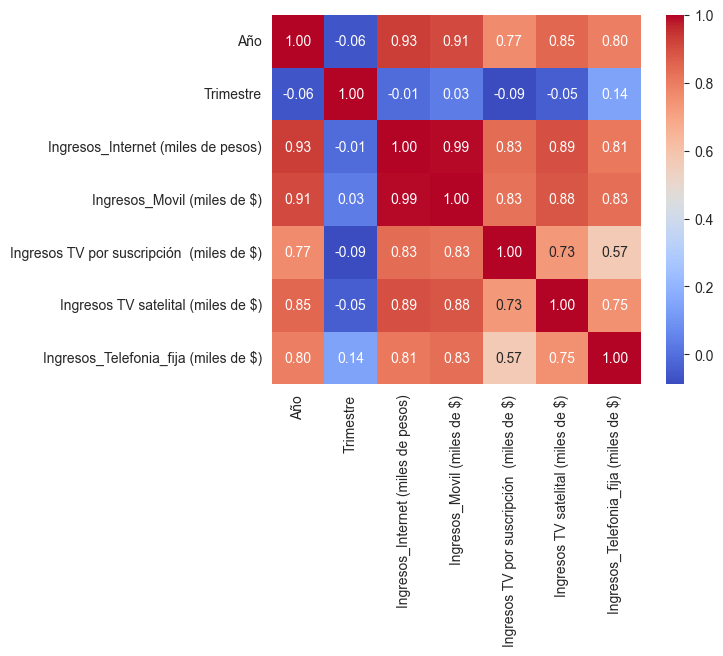

In [79]:
corr = df_service.corr(numeric_only=True)
plt.Figure(figsize=(30,30))
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
            cmap='coolwarm')
plt.show()

In [80]:
df_service.columns

Index(['Año', 'Trimestre', 'Ingresos_Internet (miles de pesos)',
       'Ingresos_Movil (miles de $)',
       'Ingresos TV por suscripción  (miles de $)',
       'Ingresos TV satelital (miles de $)',
       'Ingresos_Telefonia_fija (miles de $)'],
      dtype='object')

Nuestra variable objetivo en esta matriz es Ingresos_Internet, con esto podemos concluir que:
- El crecimiento de la telefonia movil esta fuertemente ligado con el crecimiento de los accesos a internet, lo cual logico.
- Encontramos tambien una buena correlacion con la television satelital y por suscripcion, lo cual tambien es logico. 
- Existe una correlacion considerable entre el ingreso por internet y la television satelital y television por suscripcion.

### Aumentar el internet por hogar en Argentina

Para poder aumentar el indice de internet por hogar en Argentina tomaremos las conclusiones determinadas en el proceso `Servicios adicionales` y tomaremos las columnas que mas importancia toman este proceso de analisis y se juntaran con el dataset de penetracion del internet en los hogares.

importamos el dataset de internet por hogar

In [81]:
df_internet_per_hogar = pd.read_csv('../data/Internet_Penetracion.csv')

In [82]:
df_internet_per_hogar

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,"76,64","23,95",Jul-Sept 2022
1,2022,2,"75,97","23,72",Abr-Jun 2022
2,2022,1,"73,88","23,05",Ene-Mar 2022
3,2021,4,"73,18","22,81",Oct-Dic 2021
4,2021,3,"70,58","21,98",Jul-Sept 2021
5,2021,2,"69,24","21,55",Abr-Jun 2021
6,2021,1,"67,95","21,13",Ene-Mar 2021
7,2020,4,"67,62","21,01",Oct-Dic 2020
8,2020,3,"66,31","20,59",Jul-Sept 2020
9,2020,2,"64,21","19,92",Abr-Jun 2020


Eliminamos la Columna de Periodo y cambiamos las comas de las las columnas de **Accesos por cada 100 hogares y Accesos por cada 100 hab**, ademas de hacerlos valores tipo flotante

In [83]:
df_internet_per_hogar.drop(columns='Periodo', inplace=True)

In [84]:
df_internet_per_hogar['Accesos por cada 100 hogares'] = df_internet_per_hogar['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
df_internet_per_hogar['Accesos por cada 100 hab'] = df_internet_per_hogar['Accesos por cada 100 hab'].str.replace(',', '.').astype(float)

In [85]:
df_internet_per_hogar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.2 KB


Tomar las columnas que mas correlacion tienen con el ingreso por internet.

In [93]:
df_service_filtered = df_service[['Año', 'Trimestre', 'Ingresos_Internet (miles de pesos)',
       'Ingresos_Movil (miles de $)',
       'Ingresos TV por suscripción  (miles de $)',
       'Ingresos TV satelital (miles de $)',
       'Ingresos_Telefonia_fija (miles de $)']]

In [94]:
df_service_hogar = pd.merge(df_service_filtered, df_internet_per_hogar, on=['Año', 'Trimestre'])

In [95]:
df_service_hogar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Año                                        35 non-null     int64  
 1   Trimestre                                  35 non-null     int64  
 2   Ingresos_Internet (miles de pesos)         35 non-null     int64  
 3   Ingresos_Movil (miles de $)                35 non-null     int64  
 4   Ingresos TV por suscripción  (miles de $)  35 non-null     int64  
 5   Ingresos TV satelital (miles de $)         35 non-null     int64  
 6   Ingresos_Telefonia_fija (miles de $)       35 non-null     int64  
 7   Accesos por cada 100 hogares               35 non-null     float64
 8   Accesos por cada 100 hab                   35 non-null     float64
dtypes: float64(2), int64(7)
memory usage: 2.6 KB


In [96]:
df_service_hogar

,Año,Trimestre,Ingresos_Internet (miles de pesos),Ingresos_Movil (miles de $),Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $),Ingresos_Telefonia_fija (miles de $),Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2022,3,67055930,174057836,5224278463,2707319089,3144344029,76.64,23.95
1,2022,2,60335724,153032313,4629267344,2355948483,3869340008,75.97,23.72
2,2022,1,55589997,130454676,4209387019,2126808624,27985609,73.88,23.05
3,2021,4,45467887,127389786,382733918,1803806544,4061605917,73.18,22.81
4,2021,3,42999944,117751925,3639802553,180395195,2078999521,70.58,21.98
5,2021,2,38239667,104782020,3367499579,1803844236,2217875189,69.24,21.55
6,2021,1,36676371,93112153,3192451501,1803836096,2137866768,67.95,21.13
7,2020,4,33539703,83479114,2632409862,1447962262,1975030398,67.62,21.01
8,2020,3,31997445,79634755,253861546,1293320033,1816202389,66.31,20.59
9,2020,2,32102476,73538944,2462000949,1254472593,2103552289,64.21,19.92


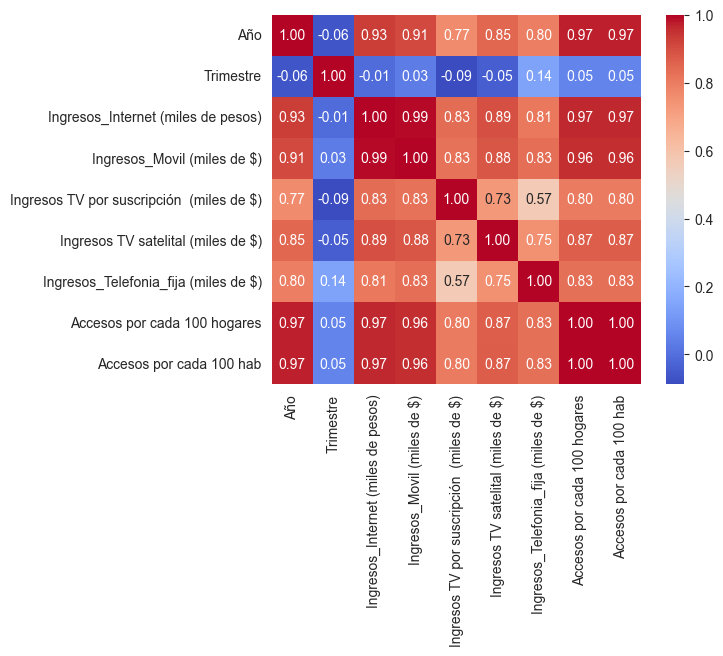

In [97]:
corr = df_service_hogar.corr(numeric_only=True)
plt.Figure(figsize=(30,30))
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
            cmap='coolwarm')
plt.show()

La variable de estudio seria Acceso por cada 100 hogares. Gracias a esta grafica podemos concluir que:
- Los ingresos conseguidos por el servicio de internet y telefonia movil estan fuertemente relacionados con el acceso de internet a los hogares argentinos.
- Es logico utilizar concluir que acceso a internet se ve potenciado por la television por suscripcion y via satelite, debido a la alta demanda de televisores smart TV, los cuales muestran su maximo potencial con acceso a internet.

Estas conclusiones, mas las conclusiones anteriores, permiten llegar al consenso de que si quieres adentrarte en el negocio de las telecomunicaciones en Argentina debes proporcinar servicio de internet por Cablemodem o Fibra optica con velocidades mayores a 30 Mbps, ademas de poder incluir un servicio de telefonia movil (Con empresa conjunta que quiera tambien entrar al mercado Argentino o empresa local que ya tenga un publico ganado) y television satelital o servicio de television por suscripcion (Netflix, Amazon Prime, Disney+).

In [101]:
df_service_hogar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Año                                        35 non-null     int64  
 1   Trimestre                                  35 non-null     int64  
 2   Ingresos_Internet (miles de pesos)         35 non-null     int64  
 3   Ingresos_Movil (miles de $)                35 non-null     int64  
 4   Ingresos TV por suscripción  (miles de $)  35 non-null     int64  
 5   Ingresos TV satelital (miles de $)         35 non-null     int64  
 6   Ingresos_Telefonia_fija (miles de $)       35 non-null     int64  
 7   Accesos por cada 100 hogares               35 non-null     float64
 8   Accesos por cada 100 hab                   35 non-null     float64
dtypes: float64(2), int64(7)
memory usage: 2.6 KB
